<a href="https://colab.research.google.com/github/HengamehSM/Projects/blob/master/Dominant_colors_in_images_CLUSTER_ANALYSIS_IN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans, vq
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
image = img.imread('sky.jpg')

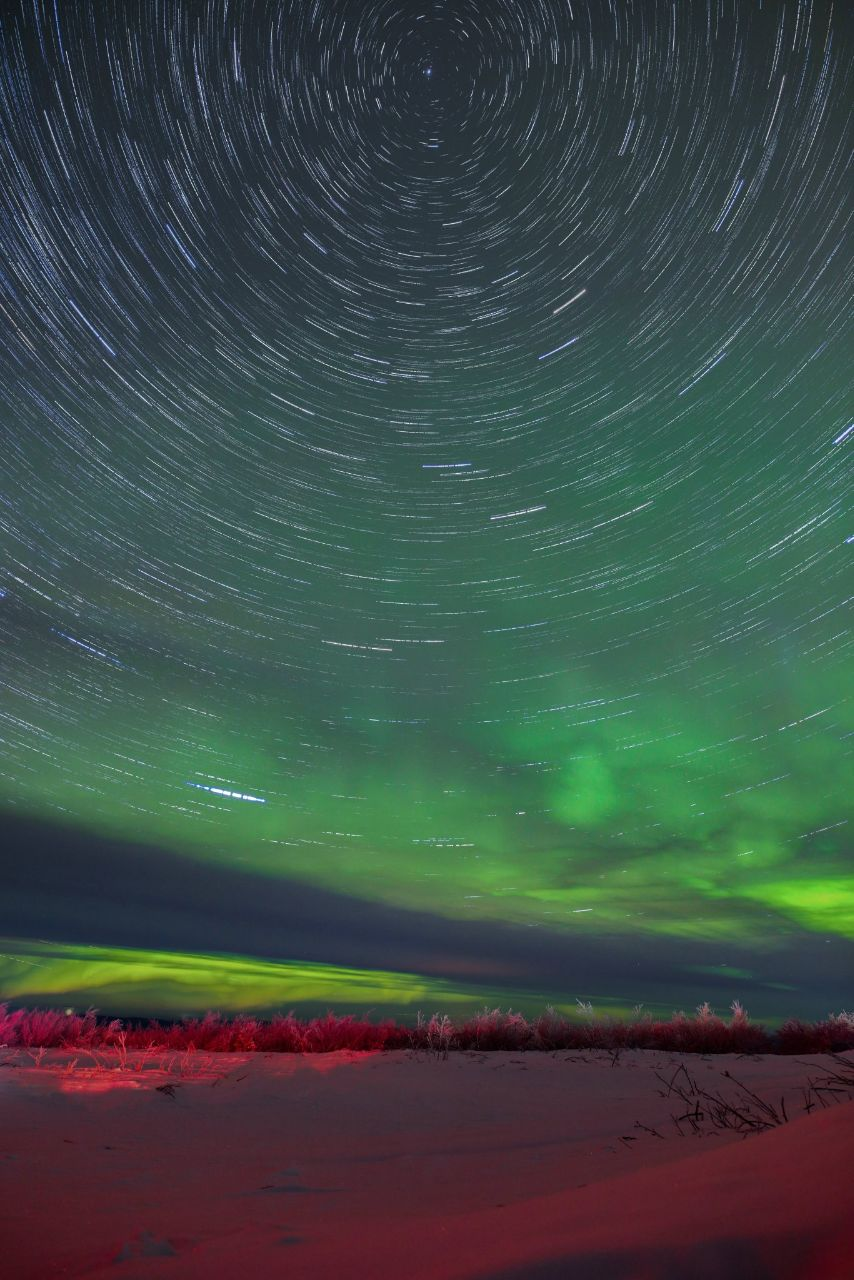

In [ ]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "sky.jpg", width = 300, height = 600)

In [ ]:
image.shape

(1280, 854, 3)

In [ ]:
r=[]
g=[]
b=[]

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [ ]:
pixels=pd.DataFrame({'red':r,
                    'blue':b,
                    'green':g})
pixels.head()

,red,blue,green
0,22,33,27
1,22,33,27
2,21,32,26
3,20,31,25
4,17,28,22


In [ ]:
pixels['scaled_red']=whiten(pixels['red'])
pixels['scaled_blue']=whiten(pixels['blue'])
pixels['scaled_green']=whiten(pixels['green'])

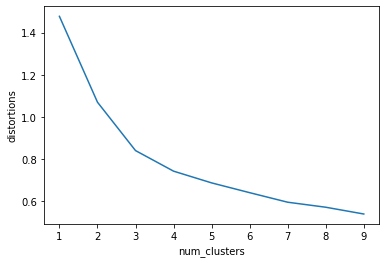

In [ ]:
distortions = []
num_clusters = range(1, 10)
# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red','scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,'distortions': distortions})
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

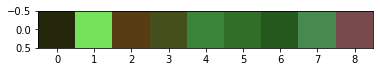

In [ ]:
colors= []

# Get standard deviations of each color
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()